In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels
import statsmodels.api as sm

In [2]:
# importing data, getting dimensions
homes = pd.read_csv("/Users/danieldetrick/Documents/GitHub/RealEstate.csv")

In [3]:
# choosing specific collumns, removing the rest 
homes = homes[['prop type', 'city', 'postal code', 'price', 'bed', 'bath', 'sqft']]

In [4]:
# cleaning data and setting types
homes['sqft'] = homes['sqft'].str.replace(",", "")
homes['price'] = homes['price'].str.replace(",", "")
homes['price'] = homes['price'].str.replace("$", "")
homes['bath'] = homes['bath'].str.replace("+", "")

homes['bath'] = pd.to_numeric(homes['bath'])
homes['sqft'] = pd.to_numeric(homes['sqft'])
homes['price'] = pd.to_numeric(homes['price'])

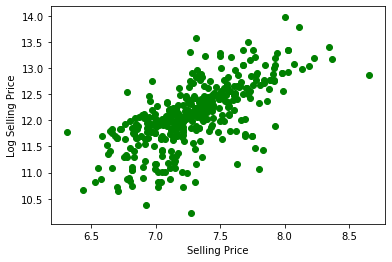

In [5]:
# Plotting the first realtionship between square feet and price
plt.scatter(np.log(homes['sqft']), np.log(homes['price']), color='g')
plt.xlabel('Selling Price')
plt.ylabel('Log Selling Price')
plt.show()

In [6]:
##Drop NaN values found in sqft and resetting index 
homes.dropna(inplace = True)
homes.reset_index(drop=True, inplace = True)
homes.head(5)

,prop type,city,postal code,price,bed,bath,sqft
0,Condo/Townhome,Westerville,43081,179900,2.0,2.0,1466.0
1,Condo/Townhome,Westerville,43081,404000,3.0,3.0,2400.0
2,Condo/Townhome,Columbus,43240,245000,2.0,3.5,2058.0
3,Condo/Townhome,Columbus,43215,181500,2.0,1.5,988.0
4,Condo/Townhome,Grove City,43123,200000,4.0,2.5,1590.0


In [7]:
# Preparing to make ML model for SLR
x = homes['sqft'].values.reshape(-1,1)
y = homes['price'].values.reshape(-1,1)

In [8]:
# Splits data into testing vs training set then creats model 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print(regressor.intercept_)
print(regressor.coef_)

[-32074.62612827]
[[159.16368481]]


In [9]:
# Outputs actual selling price vs model prediction
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(5)

,Actual,Predicted
0,126500,141095.462947
1,161000,183433.003107
2,175000,185024.639955
3,216000,175952.309921
4,385000,878978.305736


In [10]:
# Now I start with MLR

In [11]:
# I do not want to include land properties in this analysis so I will sort them out 
homes['prop type'].unique()

# removing property type land:
homes = homes[(homes['prop type'] != 'Land')]

In [12]:
# Seeing how many homes I still have in my data set
homes.shape

(369, 7)

In [13]:
# Condo vs not
homes['Condo?'] = homes.apply(lambda x: (1 if x['prop type'] == 'Condo/Townhome' else 0), axis=1)

In [14]:
# We have 15 unique cities- I will 
homes['city'].unique()

array(['Westerville', 'Columbus', 'Grove City', 'Dublin',
       'Canal Winchester', 'Groveport', 'Worthington', 'Hilliard',
       'New Albany', 'Galloway', 'Reynoldsburg', 'Blacklick', 'Powell',
       'Lewis Center'], dtype=object)

In [15]:
# Adding binary varibales for each city- i think we can do this in a loop just wasnt sure how
homes['Westerville'] = homes.apply(lambda x: (1 if x['city'] == 'Westerville' else 0), axis=1)
homes['Blacklick'] = homes.apply(lambda x: (1 if x['city'] == 'Blacklick' else 0), axis=1)
homes['Columbus'] = homes.apply(lambda x: (1 if x['city'] == 'Columbus' else 0), axis=1)
homes['Grove City'] = homes.apply(lambda x: (1 if x['city'] == 'Grove City' else 0), axis=1)
homes['Dublin'] = homes.apply(lambda x: (1 if x['city'] == 'Dublin' else 0), axis=1)
homes['Canal Winchester'] = homes.apply(lambda x: (1 if x['city'] == 'Canal Winchester' else 0), axis=1)
homes['Groveport'] = homes.apply(lambda x: (1 if x['city'] == 'Groveport' else 0), axis=1)
homes['Worthington'] = homes.apply(lambda x: (1 if x['city'] == 'Worthington' else 0), axis=1)
homes['Hilliard'] = homes.apply(lambda x: (1 if x['city'] == 'Hilliard' else 0), axis=1)
homes['New Albany'] = homes.apply(lambda x: (1 if x['city'] == 'New Albany' else 0), axis=1)
homes['Galloway'] = homes.apply(lambda x: (1 if x['city'] == 'Galloway' else 0), axis=1)
homes['Reynoldsburg'] = homes.apply(lambda x: (1 if x['city'] == 'Reynoldsburg' else 0), axis=1)
homes['Powell'] = homes.apply(lambda x: (1 if x['city'] == 'Powell' else 0), axis=1)
homes['Lewis Center'] = homes.apply(lambda x: (1 if x['city'] == 'Lewis Center' else 0), axis=1)

In [16]:
X = homes[['bed', 'bath', 'sqft', 'Condo?', 'Westerville', 'Blacklick', 'Columbus', 
          'Grove City', 'Dublin', 'Canal Winchester', 'Groveport', 
          'Worthington', 'Hilliard', 'New Albany', 'Galloway', 'Reynoldsburg', 
          'Powell', 'Lewis Center']]
Y = homes['price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
model= regressor.fit(X_train, y_train) 
print('Intercept: \n', regressor.intercept_)
print('Coefficients: \n', regressor.coef_)

Intercept: 
 2064.060468342941
Coefficients: 
 [-34310.34410923  40447.84456852    148.66617706  -8861.19065191
 -17931.81670345 -59733.2397866   12753.70974517   4616.60561438
  44701.89024799 -29153.62649476  27337.44667794  24991.32664527
  22649.31488583 -16132.04014312  -2911.78013516 -59522.62971463
  18381.35389674  29953.48526439]


In [18]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [19]:
df.head(10)

,Actual,Predicted
140,265000,264400.854711
150,160000,168212.323123
312,64000,160351.123543
60,198000,252061.562015
341,542500,396337.178142
145,310000,150097.462936
37,187000,202835.783051
244,245600,164352.319009
74,1175000,464845.048585
263,81000,116876.497666


In [20]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     22.19
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.04e-45
Time:                        21:29:13   Log-Likelihood:                -4768.6
No. Observations:                 369   AIC:                             9573.
Df Residuals:                     351   BIC:                             9644.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.644e+04   2.48e+04  

/Users/danieldetrick/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
